In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import datetime as dt

In [155]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [157]:
cat_features = [col for col in df.columns if df[col].dtype == 'object']
num_features = [col for col in df.columns if df[col].dtype != 'object' and col != 'Item_Outlet_Sales']

<h1> Deal with Neumric Features </h1>

In [158]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


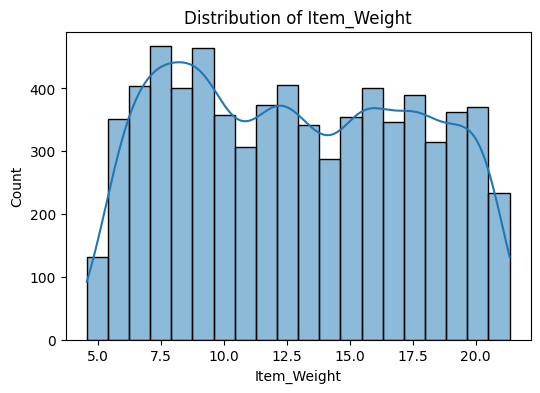

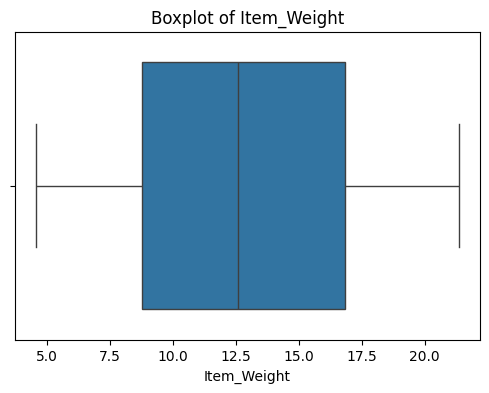

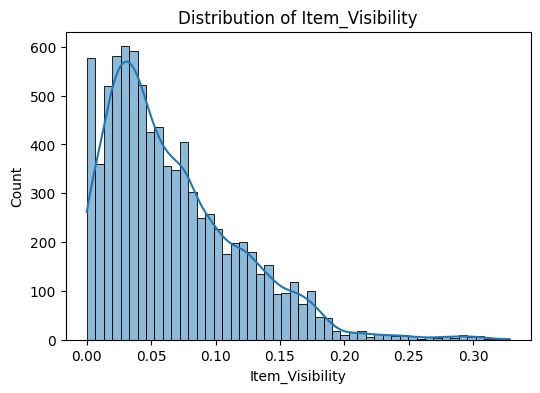

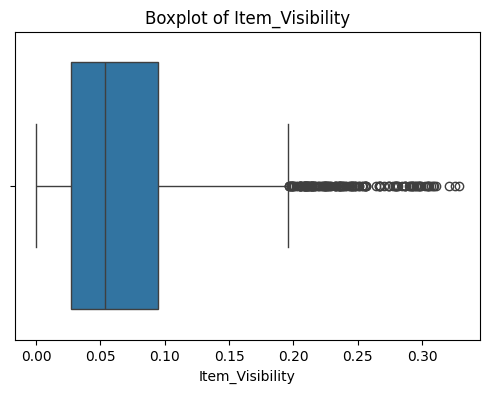

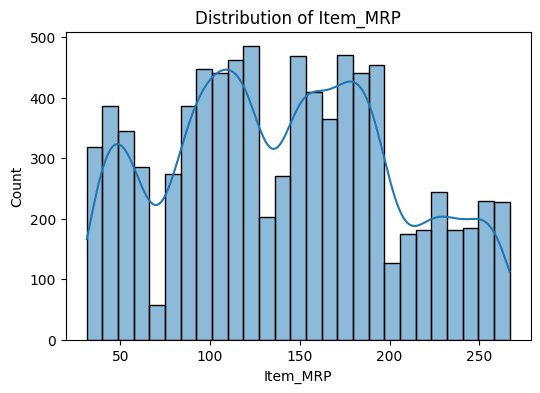

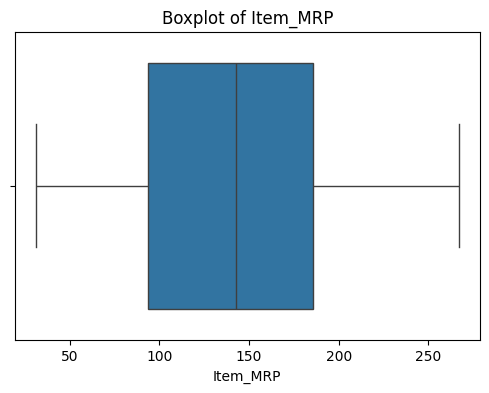

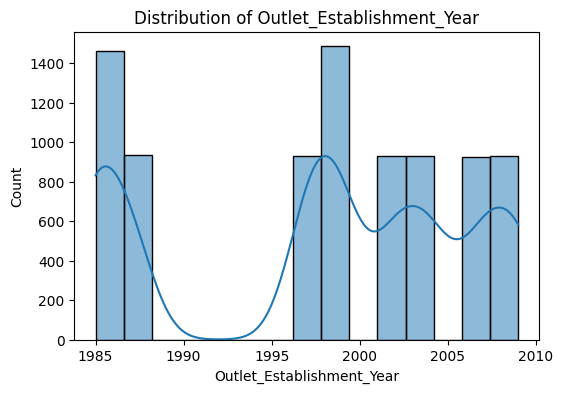

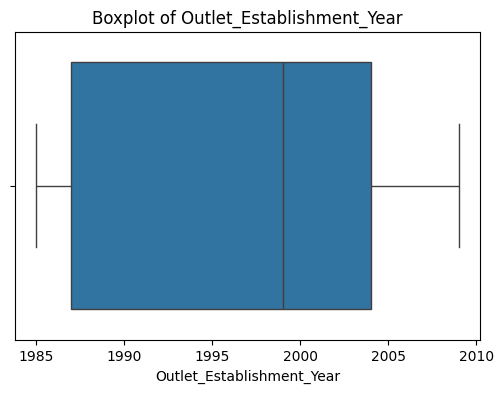

In [159]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [168]:
current_year = dt.datetime.now().year
df["Outlet_Age"] = current_year - df["Outlet_Establishment_Year"]
df.drop(columns=["Outlet_Establishment_Year"], inplace=True)    
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_sqrt
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26,0.126678
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,16,0.138846
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,26,0.129461
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,27,0.000000
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,38,0.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Outlet_Age            8523 non-null   int64  
 11  Item_Visibility_sqrt  8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [162]:
mode_size = df.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x: x.mode()[0])
mode_size

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [163]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Type"].map(mode_size))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [164]:
df["Item_Weight"] = df.groupby("Item_Type")["Item_Weight"].transform(
    lambda x: x.fillna(x.median())
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [165]:
df['Item_Visibility_sqrt'] = np.sqrt(df['Item_Visibility'])
df.drop(columns=['Item_Visibility'], inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_sqrt
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26,0.126678
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16,0.138846
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26,0.129461
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,27,0.000000
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38,0.000000


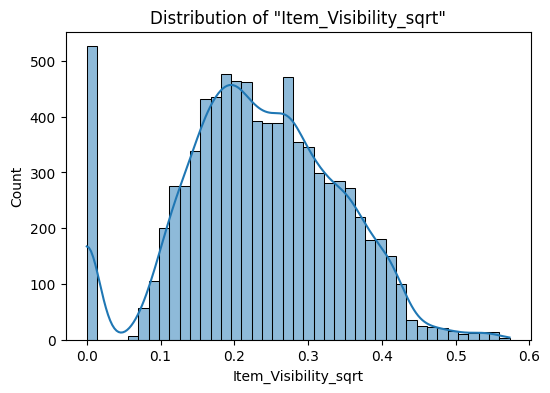

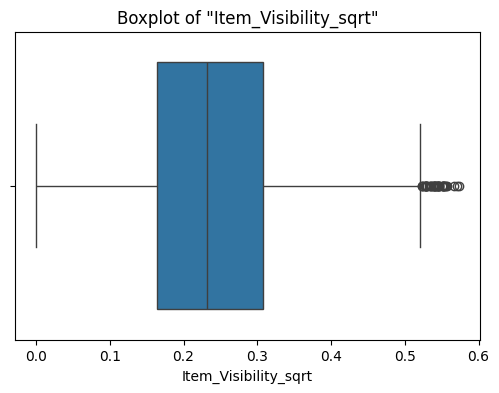

In [166]:
plt.figure(figsize=(6,4))
sns.histplot(df["Item_Visibility_sqrt"], kde=True)
plt.title(f'Distribution of "Item_Visibility_sqrt"')
plt.show()
    
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Item_Visibility_sqrt"])
plt.title(f'Boxplot of "Item_Visibility_sqrt"')
plt.show()

<Axes: >

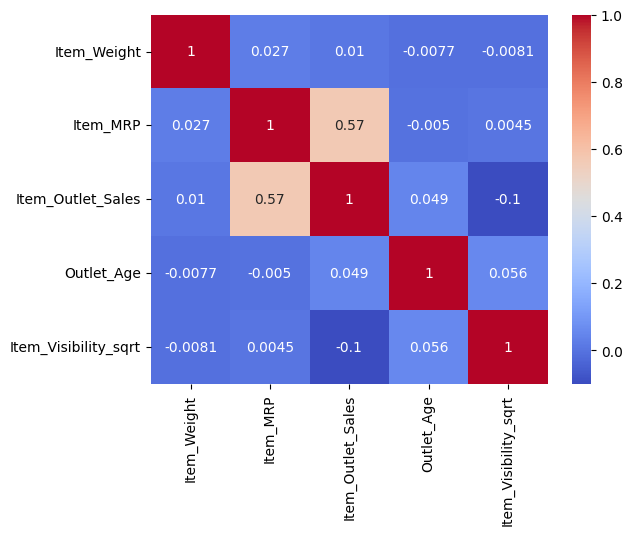

In [170]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap='coolwarm')

<h1> Deal with Categorical Features </h1>

In [60]:
for col in cat_features:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print("*"*60)

Item_Identifier: 1559 unique values
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
************************************************************
Item_Fat_Content: 5 unique values
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
************************************************************
Item_Type: 16 unique values
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood  

In [171]:
df["Item_Category"] = df["Item_Identifier"].str[:2]
df.drop(columns=["Item_Identifier"], inplace=True)
df["Item_Category"].value_counts()

Item_Category
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [172]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

<h1> Build The Model </h1>

In [173]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].astype("category")

In [174]:
X = df.drop(columns=["Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]

In [175]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
xgb = XGBRegressor(n_estimators=300, enable_categorical = True, tree_method = "hist", random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.48157303972547705


In [177]:
cat_cols = df.select_dtypes(include=["category"]).columns
for col in cat_cols:
    df[col] = df[col].astype("object")

In [178]:
numeric_features = [col for col in df.columns if df[col].dtype != 'object' and col != 'Item_Outlet_Sales']
onehot_features = ["Item_Category", "Item_Fat_Content", "Item_Type","Outlet_Type"]
label_features = ["Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type"]  


In [190]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)) 
])
onehot_transformer = OneHotEncoder(handle_unknown="ignore")
label_transformer = OrdinalEncoder()

In [191]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("onehot", onehot_transformer, onehot_features),
        ("label", label_transformer, label_features),
    ],
    remainder='drop'
)

In [192]:
X = df.drop(columns=["Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000, random_state=42),
    "Ridge Regression": Ridge(alpha=2.0, max_iter=10000, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=1000, max_depth=15,min_samples_split=5,min_samples_leaf=2 ,random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=-1, num_leaves=31, min_child_samples=20, subsample=0.8, colsample_bytree=0.8,force_col_wise=True, random_state=42), 
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1, random_state=42)
}

In [194]:
y_train_log = np.log1p(y_train) 

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    r2_train = r2_score(y_train, pipeline.fit(x_train, y_train).predict(x_train))
    print(f"{model_name} R^2 Score on Training Data: {r2_train}")
    
    pipeline.fit(x_train, y_train_log)
    
    y_pred = np.expm1(pipeline.predict(x_test))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R^2 Score: {r2}\n")

Linear Regression R^2 Score on Training Data: 0.5642350976497421
Linear Regression R^2 Score: 0.5660245071281547

Lasso Regression R^2 Score on Training Data: 0.5642350725828784
Lasso Regression R^2 Score: 0.5629276473651363

Ridge Regression R^2 Score on Training Data: 0.5642313591546754
Ridge Regression R^2 Score: 0.5658501211786666

Random Forest R^2 Score on Training Data: 0.8382900572059558
Random Forest R^2 Score: 0.5675532592332873

[LightGBM] [Info] Total Bins 3345
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 42
[LightGBM] [Info] Start training from score 2202.365232


c:\Users\IT\anaconda3\envs\AUSAM\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM R^2 Score on Training Data: 0.793810874183133
[LightGBM] [Info] Total Bins 3345
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 42
[LightGBM] [Info] Start training from score 7.309469


c:\Users\IT\anaconda3\envs\AUSAM\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM R^2 Score: 0.5756383552362314

XGBoost R^2 Score on Training Data: 0.9427360019086647
XGBoost R^2 Score: 0.5392440902573246

